In [1148]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

#### READ DATASET

In [1149]:
df=pd.read_csv("Captan_v1.csv",)
df1=df.copy()
df

,price,km,kw,displacement,weight,consumption_combi,co2_emission_,comfort_&_convenience_3_armrest,comfort_&_convenience_4_automatic_climate_control,comfort_&_convenience_6_cruise_control,...,gears_8.0,seats_2.0,seats_3.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,e_class_4.0,e_class_5.0,e_class_6.0
0,15770.0,0.487443,0.207547,0.475499,0.318408,0.038,99.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1,14500.0,0.696185,0.915094,0.816697,0.353234,0.056,129.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
2,14640.0,0.726208,0.386792,0.635209,0.233831,0.038,99.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,1
3,14500.0,0.635269,0.207547,0.475499,0.293532,0.038,99.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
4,16790.0,0.140977,0.207547,0.475499,0.233831,0.041,109.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,39980.0,0.000870,0.698113,0.635209,0.829851,0.047,123.0,1.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,1
13850,39950.0,0.000000,0.971698,0.997278,0.853731,0.053,139.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
13851,39950.0,0.000000,0.971698,0.997278,0.853731,0.053,139.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
13852,39875.0,0.000131,0.962264,0.997278,0.829851,0.053,139.0,1.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,1


##### DATA PREPARATION

In [1150]:
df.shape

(13854, 115)

In [1151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13854 entries, 0 to 13853
Columns: 115 entries, price to e_class_6.0
dtypes: float64(37), int64(78)
memory usage: 12.2 MB


In [1152]:
df.describe()

,price,km,kw,displacement,weight,consumption_combi,co2_emission_,comfort_&_convenience_3_armrest,comfort_&_convenience_4_automatic_climate_control,comfort_&_convenience_6_cruise_control,...,gears_8.0,seats_2.0,seats_3.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,e_class_4.0,e_class_5.0,e_class_6.0
count,13854.000000,13854.000000,13854.000000,13854.000000,13854.000000,13854.000000,13854.000000,13854.000000,13854.000000,13854.000000,...,13854.000000,13854.000000,13854.000000,13854.000000,13854.000000,13854.000000,13854.000000,13854.000000,13854.000000,13854.000000
mean,18119.508517,0.228032,0.402689,0.460794,0.424938,0.047683,116.389129,0.511188,0.591454,0.734878,...,0.011910,0.004114,0.000072,0.080121,0.897286,0.000072,0.018334,0.000144,0.003826,0.996030
std,6348.368440,0.246998,0.209150,0.246619,0.182709,0.007996,16.037010,0.499893,0.491583,0.441414,...,0.108485,0.064013,0.008496,0.271491,0.303596,0.008496,0.134161,0.012015,0.061735,0.062885
min,8000.000000,0.000000,0.000000,0.000000,0.000000,0.030000,80.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13500.000000,0.008522,0.207547,0.271325,0.263682,0.041000,104.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,17250.000000,0.160993,0.386792,0.475499,0.383085,0.047000,114.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,21900.000000,0.339390,0.528302,0.635209,0.522388,0.054000,127.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,44970.000000,1.000000,1.000000,1.000000,1.000000,0.075000,164.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1153]:
df.head()

,price,km,kw,displacement,weight,consumption_combi,co2_emission_,comfort_&_convenience_3_armrest,comfort_&_convenience_4_automatic_climate_control,comfort_&_convenience_6_cruise_control,...,gears_8.0,seats_2.0,seats_3.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,e_class_4.0,e_class_5.0,e_class_6.0
0,15770.0,0.487443,0.207547,0.475499,0.318408,0.038,99.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1,14500.0,0.696185,0.915094,0.816697,0.353234,0.056,129.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
2,14640.0,0.726208,0.386792,0.635209,0.233831,0.038,99.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,1
3,14500.0,0.635269,0.207547,0.475499,0.293532,0.038,99.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
4,16790.0,0.140977,0.207547,0.475499,0.233831,0.041,109.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1


##### DISTRIBUTION OF FEATURES

In [1154]:
#sns.heatmap(df.corr(), annot = True);

In [1155]:
import missingno as msno

##### TRAIN - TEST SPLIT

In [1156]:
from sklearn.model_selection import train_test_split

In [1157]:
y=df.price
X=df.drop(["price"],axis=1)

In [1158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [1159]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11083, 114)
Train target shape   :  (11083,)
Test features shape  :  (2771, 114)
Test target shape    :  (2771,)


In [1160]:
X_train

,km,kw,displacement,weight,consumption_combi,co2_emission_,comfort_&_convenience_3_armrest,comfort_&_convenience_4_automatic_climate_control,comfort_&_convenience_6_cruise_control,comfort_&_convenience_15_keyless_central_door_lock,...,gears_8.0,seats_2.0,seats_3.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,e_class_4.0,e_class_5.0,e_class_6.0
12361,0.405615,0.094340,0.227768,0.217910,0.056,135.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
9963,0.696185,0.528302,0.637024,0.584080,0.040,99.0,1.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
8645,0.240253,0.066038,0.300363,0.261692,0.053,124.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
7632,0.000000,0.622642,0.454628,0.376119,0.054,125.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
10843,0.129447,0.528302,0.635209,0.681592,0.052,137.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.002176,0.386792,0.091652,0.354229,0.051,117.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
13418,0.922445,0.669811,0.633394,0.829851,0.038,120.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
5390,0.000044,0.622642,0.544465,0.422886,0.055,124.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
860,0.419451,0.245283,0.091652,0.208955,0.042,97.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [1161]:
X_test

,km,kw,displacement,weight,consumption_combi,co2_emission_,comfort_&_convenience_3_armrest,comfort_&_convenience_4_automatic_climate_control,comfort_&_convenience_6_cruise_control,comfort_&_convenience_15_keyless_central_door_lock,...,gears_8.0,seats_2.0,seats_3.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,e_class_4.0,e_class_5.0,e_class_6.0
9548,0.701537,0.764151,0.960073,0.584080,0.057,150.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
5066,0.000287,0.386792,0.635209,0.462687,0.044,114.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
10095,0.277604,0.415094,0.635209,0.584080,0.041,114.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
1611,0.000696,0.386792,0.091652,0.233831,0.048,108.0,1.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
2140,0.043512,0.386792,0.091652,0.233831,0.048,110.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12339,0.335039,0.103774,0.510889,0.260697,0.033,85.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
9436,0.000000,0.066038,0.300363,0.187065,0.053,124.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
9682,0.844124,0.528302,0.635209,0.797015,0.050,132.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
8805,0.193748,0.066038,0.300363,0.261692,0.053,124.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1


In [1162]:
y_train

12361     9289.0
9963     12990.0
8645      9495.0
7632     18338.0
10843    22900.0
          ...   
5191     24790.0
13418    20995.0
5390     25410.0
860      14950.0
7270     28300.0
Name: price, Length: 11083, dtype: float64

In [1163]:
y_test

9548     16490.0
5066     22375.0
10095    14995.0
1611     23200.0
2140     24880.0
          ...   
12339     9450.0
9436     11100.0
9682     13900.0
8805      9900.0
13182    10800.0
Name: price, Length: 2771, dtype: float64

### Model Fitting and Compare Actual and Predicted Labels

In [1164]:
from sklearn.linear_model import LinearRegression

In [1165]:
model = LinearRegression()

In [1166]:
model.fit(X_train, y_train)

LinearRegression()

In [1167]:
y_pred = model.predict(X_test)
y_pred

array([21226.72726965, 23967.84746006, 16081.47982041, ...,
       15085.34382125, 10260.63294007, 14047.59788434])

In [1168]:
model.coef_

array([-5.36462115e+03,  6.58549084e+03,  1.13691548e+03, -1.10423761e+03,
        3.86643795e+04, -3.19744486e+01, -2.41567977e+02,  2.32357295e+02,
        2.43752989e+02,  4.05891974e+02,  3.36678445e+02,  4.99353716e+01,
        5.32945006e+01,  4.10559566e+02,  5.06572075e+02,  2.96740469e+02,
        3.14238011e+02, -4.79757853e+02, -1.92157856e+02,  1.40452848e+02,
       -1.30323006e+02,  2.91353506e+02,  1.20370652e+02,  4.29295259e+01,
       -3.10641028e+02,  9.14516492e+02,  5.19122098e+02, -2.13808824e+02,
        3.29637502e+02,  6.14608003e+01,  3.18648044e+02, -3.67606764e+02,
       -7.28490811e+01,  8.14075022e+02, -2.34972956e+02, -7.44958574e+01,
        1.71268694e+03,  3.22365631e+03, -1.93578901e+03, -4.83010787e+03,
        1.34027589e+03, -4.52695502e+03,  5.01623275e+03,  4.97308464e+02,
        4.82377968e+02,  1.98550202e+03,  5.21580918e+02,  8.09847966e+02,
       -1.49027435e+03,  1.94190502e+03,  6.17209044e+01,  2.29564062e+03,
       -8.27148676e+02, -

In [1169]:
model.intercept_

18714.272145227365

In [1170]:
sum(X_test.loc[95] * model.coef_) + model.intercept_

21266.58978287086

In [1171]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred, "LSE":(y_test-y_pred)**2, "ABS": abs(y_test-y_pred)}

In [1172]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual,LSE,ABS
9548,16490.0,21226.727270,-4736.727270,2.243659e+07,4736.727270
5066,22375.0,23967.847460,-1592.847460,2.537163e+06,1592.847460
10095,14995.0,16081.479820,-1086.479820,1.180438e+06,1086.479820
1611,23200.0,20077.522770,3122.477230,9.749864e+06,3122.477230
2140,24880.0,26559.572185,-1679.572185,2.820963e+06,1679.572185
...,...,...,...,...,...
12339,9450.0,8150.994930,1299.005070,1.687414e+06,1299.005070
9436,11100.0,14491.186045,-3391.186045,1.150014e+07,3391.186045
9682,13900.0,15085.343821,-1185.343821,1.405040e+06,1185.343821
8805,9900.0,10260.632940,-360.632940,1.300561e+05,360.632940


In [1173]:
result_sample = comparing.iloc[:, :3]
result_sample

,Actual,Pred,Residual
9548,16490.0,21226.727270,-4736.727270
5066,22375.0,23967.847460,-1592.847460
10095,14995.0,16081.479820,-1086.479820
1611,23200.0,20077.522770,3122.477230
2140,24880.0,26559.572185,-1679.572185
...,...,...,...
12339,9450.0,8150.994930,1299.005070
9436,11100.0,14491.186045,-3391.186045
9682,13900.0,15085.343821,-1185.343821
8805,9900.0,10260.632940,-360.632940


In [1174]:
#result_sample.plot(kind ="bar", figsize=(15,9))
#plt.show()

#### ERROR METRICS

In [1175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [1176]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.892734486528349

In [1177]:
mae = mean_absolute_error(y_test, y_pred) #comparing.ABS.sum()/X_test.shape[0]
mae

1493.3863532738155

In [1178]:
mse = mean_squared_error(y_test, y_pred) # comparing.LSE.sum()/X_test.shape[0]
mse

4217896.910138777

In [1179]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #(comparing.LSE.sum()/X_test.shape[0])**0.5
rmse

2053.751910562417

In [1180]:
mae/df.price.mean()

0.08241870091785794

In [1181]:
rmse/df.price.mean()

0.11334479125582822

#### Adjusted R2 score 



In [1182]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0] # number of observations (rows)
    p = X.shape[1] # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [1183]:
df.shape

(13854, 115)

In [1184]:
adj_r2(y_test, y_pred, df)

0.8918444458750432

#### What is the concept of punishment for RMSE error metric?

#### Evaluation Model

In [1185]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")

In [1186]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score : 0.892734486528349
MAE      : 1493.3863532738155
MSE      : 4217896.910138777
RMSE     : 2053.751910562417


In [1187]:
y_train_pred = model.predict(X_train)

In [1188]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score : 0.892734486528349
MAE      : 1493.3863532738155
MSE      : 4217896.910138777
RMSE     : 2053.751910562417


#### Plotting residuals

In [1189]:
residuals = y_test-y_pred

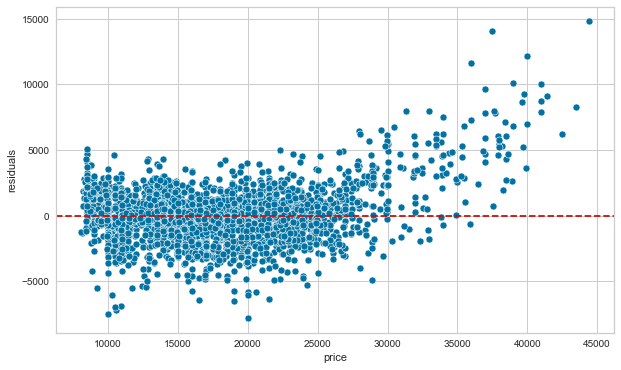

In [1190]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

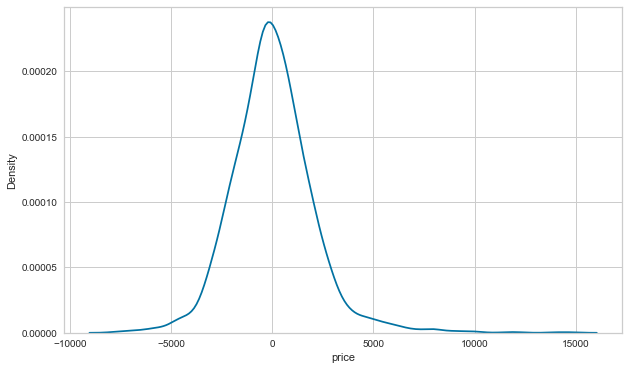

In [1191]:
sns.kdeplot(residuals);

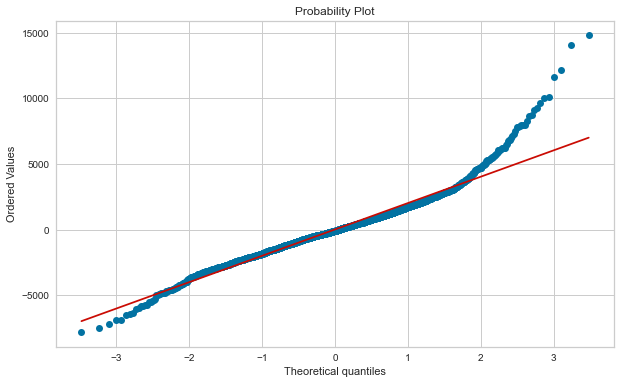

In [1192]:
stats.probplot(residuals, dist ="norm", plot =plt);

In [1193]:
from scipy.stats import skew
skew(residuals)

0.8438138967235556

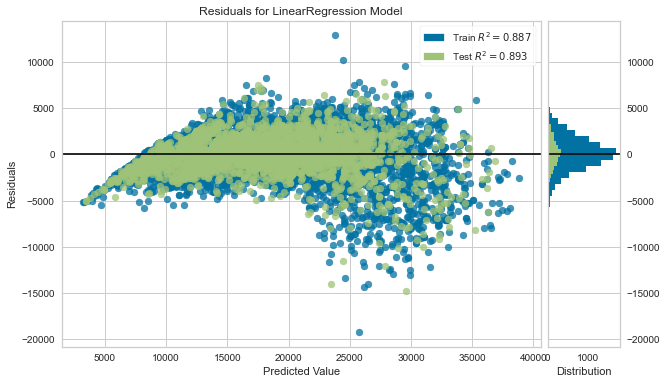

In [1194]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

#### Prediction Error for LinearRegression

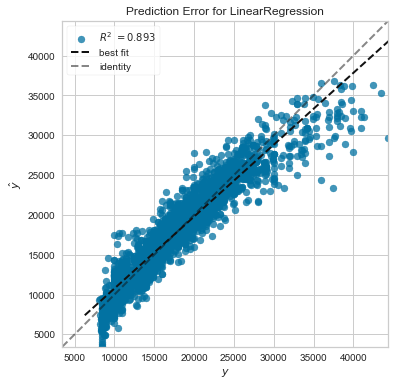

In [1195]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

#### Retraining Model on Full Data

In [1196]:
final_model = LinearRegression()

In [1197]:
final_model.fit(X, y)

LinearRegression()

#### Coefficients

In [1198]:
final_model.coef_

array([-5.40284155e+03,  6.72887444e+03,  9.82833965e+02, -1.19779716e+03,
        3.29174624e+04, -2.89848745e+01, -2.91709583e+02,  2.57843624e+02,
        2.46555218e+02,  3.78031874e+02,  3.17517721e+02,  3.59702042e+01,
        8.16760018e+01,  4.22504994e+02,  5.09425462e+02,  3.02129315e+02,
        3.12374290e+02, -4.72937831e+02, -2.04122300e+02,  1.34506096e+02,
       -1.14488226e+02,  2.40736050e+02,  1.00974883e+02,  5.96230616e+01,
       -2.76671347e+02,  8.83370249e+02,  5.12201268e+02, -2.05677569e+02,
        3.33677132e+02,  4.68124727e+01,  3.04443488e+02, -3.59113752e+02,
       -5.04219041e+01,  8.23413145e+02, -2.37480153e+02, -7.48948032e+01,
        1.76706713e+03,  3.22177320e+03, -1.95126902e+03, -4.80123083e+03,
        1.30262919e+03, -4.49229498e+03,  4.95332531e+03,  4.55832622e+02,
        1.36236318e+03,  2.20714353e+03,  4.65519060e+02,  7.96480822e+02,
       -1.42438264e+03,  1.73705954e+03,  5.48709427e+01,  2.57490016e+03,
       -4.83320494e+02, -

In [1199]:
final_model.intercept_

18001.594914988185

In [1200]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [1201]:
coeff_df

,Coefficient
km,-5402.841549
kw,6728.874442
displacement,982.833965
weight,-1197.797162
consumption_combi,32917.462445
...,...
seats_6.0,2344.378302
seats_7.0,144.125522
e_class_4.0,610.851194
e_class_5.0,-307.465252


#### Prediction on New Data

In [1202]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,13854.0,18119.508517,6348.368440,8000.0,13500.000000,17250.000000,21900.000000,44970.0
km,13854.0,0.228032,0.246998,0.0,0.008522,0.160993,0.339390,1.0
kw,13854.0,0.402689,0.209150,0.0,0.207547,0.386792,0.528302,1.0
displacement,13854.0,0.460794,0.246619,0.0,0.271325,0.475499,0.635209,1.0
weight,13854.0,0.424938,0.182709,0.0,0.263682,0.383085,0.522388,1.0
...,...,...,...,...,...,...,...,...
seats_6.0,13854.0,0.000072,0.008496,0.0,0.000000,0.000000,0.000000,1.0
seats_7.0,13854.0,0.018334,0.134161,0.0,0.000000,0.000000,0.000000,1.0
e_class_4.0,13854.0,0.000144,0.012015,0.0,0.000000,0.000000,0.000000,1.0
e_class_5.0,13854.0,0.003826,0.061735,0.0,0.000000,0.000000,0.000000,1.0


In [1203]:
df.corr()

,price,km,kw,displacement,weight,consumption_combi,co2_emission_,comfort_&_convenience_3_armrest,comfort_&_convenience_4_automatic_climate_control,comfort_&_convenience_6_cruise_control,...,gears_8.0,seats_2.0,seats_3.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,e_class_4.0,e_class_5.0,e_class_6.0
price,1.000000,-0.355806,0.652734,0.224174,0.458608,0.168015,0.219834,0.303444,0.419600,0.081560,...,0.168118,-0.088491,0.006652,-0.042758,-0.039826,-0.006183,0.218839,-0.014621,-0.042797,0.044808
km,-0.355806,1.000000,0.089340,0.340067,0.191324,-0.323097,-0.198152,0.095897,0.040656,0.018426,...,-0.037177,0.002057,-0.004904,0.019581,-0.039287,0.022091,0.047209,-0.002088,0.055797,-0.054378
kw,0.652734,0.089340,1.000000,0.569433,0.675774,0.300321,0.441391,0.387485,0.420829,0.211780,...,0.184735,-0.085202,0.020816,-0.154455,0.056691,-0.006395,0.224010,-0.017716,-0.007875,0.011116
displacement,0.224174,0.340067,0.569433,1.000000,0.560356,-0.070615,0.255327,0.173364,0.218652,0.187266,...,0.210135,0.004501,0.012262,-0.194333,0.121788,-0.012686,0.115539,-0.011354,0.025289,-0.022658
weight,0.458608,0.191324,0.675774,0.560356,1.000000,0.021808,0.247361,0.192947,0.317483,0.218931,...,0.141145,-0.045234,-0.006805,-0.228767,0.085639,0.008002,0.290651,-0.012405,-0.002976,0.005291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seats_6.0,-0.006183,0.022091,-0.006395,-0.012686,0.008002,-0.006039,-0.002855,-0.008689,-0.010223,-0.014145,...,-0.000933,-0.000546,-0.000072,-0.002507,-0.025112,1.000000,-0.001161,-0.000102,-0.000527,0.000536
seats_7.0,0.218839,0.047209,0.224010,0.115539,0.290651,0.036233,0.084655,0.027079,0.085123,0.054049,...,-0.015004,-0.008784,-0.001161,-0.040333,-0.403922,-0.001161,1.000000,-0.001642,-0.008469,0.008628
e_class_4.0,-0.014621,-0.002088,-0.017716,-0.011354,-0.012405,0.013250,0.009075,-0.012288,-0.014458,0.007217,...,-0.001319,-0.000772,-0.000102,-0.003546,0.004065,-0.000102,-0.001642,1.000000,-0.000745,-0.190327
e_class_5.0,-0.042797,0.055797,-0.007875,0.025289,-0.002976,-0.026499,-0.021846,-0.030626,-0.010340,-0.005162,...,-0.006804,0.014283,-0.000527,0.011859,-0.009845,-0.000527,-0.008469,-0.000745,1.000000,-0.981579


In [1204]:
abc=df.corr()

In [1205]:
import statsmodels.api as sm

In [1206]:
lm=sm.OLS(y_train,X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     854.5
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:42:53   Log-Likelihood:            -1.0071e+05
No. Observations:               11083   AIC:                         2.016e+05
Df Residuals:                   10981   BIC:                         2.024e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
km                                                           -5364.6211    151.142    -35.494      0.000   -5660.886   -5068.356
kw                                                            6585.4908    320.048     20.577      0.000    5958.140    7212.842
displacement                                                  1136.9155    248.167      4.581      0.000     650.464    1623.367
weight                                                       -1104.2376    232.401     -4.751      0.000   -1559.785    -648.690
consumption_combi                                             3.866e+04   8447.089      4.577      0.000    2.21e+04    5.52e+04
co2_emission_                                                  -31.9744      3.640     -8.784      0.000     -39.109     -24.839
comfort_&_convenience_3_armrest                               -241.5680     59.818     -4.038      0.000    -358.822    -124.314
comfort_&_convenience_4_automatic_climate_control              232.3573     55.963      4.152      0.000     122.661     342.054
comfort_&_convenience_6_cruise_control                         243.7530     58.284      4.182      0.000     129.506     358.000
comfort_&_convenience_15_keyless_central_door_lock             405.8920     71.133      5.706      0.000     266.458     545.326
comfort_&_convenience_17_leather_steering_wheel                336.6784     57.966      5.808      0.000     223.055     450.302
comfort_&_convenience_18_light_sensor                           49.9354     63.135      0.791      0.429     -73.820     173.691
comfort_&_convenience_21_multi-function_steering_wheel          53.2945     62.044      0.859      0.390     -68.323     174.912
comfort_&_convenience_22_navigation_system                     410.5596     53.334      7.698      0.000     306.016     515.103
comfort_&_convenience_24_park_distance_control                 506.5721     87.103      5.816      0.000     335.835     677.309
comfort_&_convenience_25_parking_assist_system_camera          296.7405     71.384      4.157      0.000     156.815     436.666
comfort_&_convenience_27_parking_assist_system_sensors_front   314.2380     60.990      5.152      0.000     194.686     433.790
comfort_&_convenience_28_parking_assist_system_sensors_rear   -479.7579     91.679     -5.233      0.000    -659.465    -300.050
comfort_&_convenience_30_rain_sensor                          -192.1579     64.717     -2.969      0.003    -319.015     -65.301
comfort_&_convenience_31_seat_heating                          140.4528     57.929      2.425      0.015      26.902     254.003
comfort_&_convenience_34_start-stop_system                    -130.3230     54.175     -2.406      0.016    -236.515

In [1207]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,13854.0,18119.508517,6348.368440,8000.0,13500.000000,17250.000000,21900.000000,44970.0
km,13854.0,0.228032,0.246998,0.0,0.008522,0.160993,0.339390,1.0
kw,13854.0,0.402689,0.209150,0.0,0.207547,0.386792,0.528302,1.0
displacement,13854.0,0.460794,0.246619,0.0,0.271325,0.475499,0.635209,1.0
weight,13854.0,0.424938,0.182709,0.0,0.263682,0.383085,0.522388,1.0
...,...,...,...,...,...,...,...,...
seats_6.0,13854.0,0.000072,0.008496,0.0,0.000000,0.000000,0.000000,1.0
seats_7.0,13854.0,0.018334,0.134161,0.0,0.000000,0.000000,0.000000,1.0
e_class_4.0,13854.0,0.000144,0.012015,0.0,0.000000,0.000000,0.000000,1.0
e_class_5.0,13854.0,0.003826,0.061735,0.0,0.000000,0.000000,0.000000,1.0
